The site homepage's quotes and the bot's `.hello` look sus. Let me check it.

In [1]:
import sys
sys.path.append('../../')
import hello

objects = hello.get_site_objects("https://harry7557558.github.io/src/quotes.json")

https://harry7557558.github.io/src/quotes.json - 200


Generate random quotes in a row.

In [2]:
def rand_quote_index():
    rnd = hello.quasi_random()
    s = 0.0
    for i in range(len(objects)):
        s += objects[i]['probability']
        if s > rnd:
            return i
    assert False

qis = [rand_quote_index() for _ in range(10000)]


Generate and plot the matrix - there is a pattern?

In [3]:
import numpy as np

offset = 1
mat = np.zeros((len(objects), len(objects)), dtype=np.int32)
for p in zip(qis[:-offset], qis[offset:]):
    mat[p[0]][p[1]] += 1

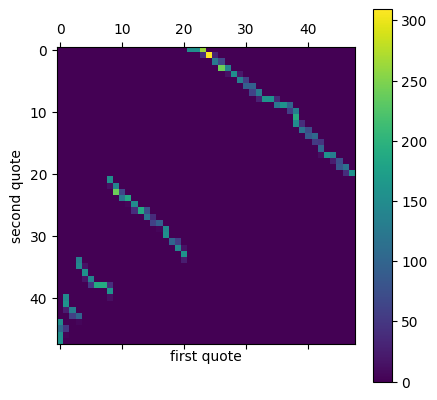

In [4]:
import matplotlib.pyplot as plt
plt.matshow(mat)
plt.xlabel("first quote")
plt.ylabel("second quote")
plt.colorbar()
plt.show()

If the bot/site shows the first quote it is guaranteed to show the second one next.

In [5]:
print(len(objects))
for i in range(len(objects)):
    ps = mat[i]
    if np.count_nonzero(ps) == 1:
        j = np.where(ps != 0)[0][0]
        print(i, j)
        print("First quote:", objects[i])
        print("Second quote:", objects[j])

48
11 38
First quote: {'text': 'Don’t jump into hot water.', 'probability': 0.01904761904761905, 'alt': None, 'psa': -1.0}
Second quote: {'text': 'Just stay away and you’ll be safe from me! -&nbsp;Queen Elsa from <i>Frozen</i>', 'probability': 0.047368421052631574, 'alt': None, 'psa': -1.0}
16 42
First quote: {'text': 'To live in the Nacirema world, you must become a Nacirema.', 'probability': 0.010000000000000002, 'alt': None, 'psa': -1.0}
Second quote: {'text': 'See the line where the sky meets the sea? It calls me. -&nbsp;Moana, <i>How&nbsp;Far&nbsp;I’ll&nbsp;Go</i>', 'probability': 0.015789473684210523, 'alt': None, 'psa': -1.0}
21 8
First quote: {'text': 'A = {x | x ∉ A}', 'probability': 0.015384615384615385, 'alt': None, 'psa': -1.0}
Second quote: {'text': 'Would you rather be able to fly, or have the ability to live in water?', 'probability': 0.0380952380952381, 'alt': None, 'psa': -1.0}
30 17
First quote: {'text': 'To-do List', 'probability': 0.015384615384615385, 'alt': None, 